Decision Tree Algorithm

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import cross_val_predict

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
168,51,F,LOW,NORMAL,23.003,drugY
130,70,F,NORMAL,HIGH,20.489,drugY
171,45,M,LOW,NORMAL,10.017,drugX
127,35,M,NORMAL,NORMAL,7.845,drugX
14,50,F,NORMAL,HIGH,12.703,drugX
191,23,M,HIGH,HIGH,8.011,drugA
47,68,M,LOW,HIGH,10.291,drugC
31,74,M,HIGH,HIGH,9.567,drugB
190,58,M,HIGH,HIGH,18.991,drugY
147,26,F,HIGH,NORMAL,12.307,drugA


In [7]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)

df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
198,23,1,2,1,14.020,drugX
43,23,1,2,0,12.260,drugX
94,56,1,1,0,15.015,drugY
42,50,1,2,1,15.790,drugY
144,39,1,0,0,9.664,drugA
4,61,0,1,0,18.043,drugY
178,39,1,2,0,15.969,drugY
20,57,1,1,1,19.128,drugY
129,32,0,2,0,7.477,drugX
163,21,0,0,1,28.632,drugY


In [9]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [10]:
y = df['Drug'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [15]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = tree_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [20]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.95


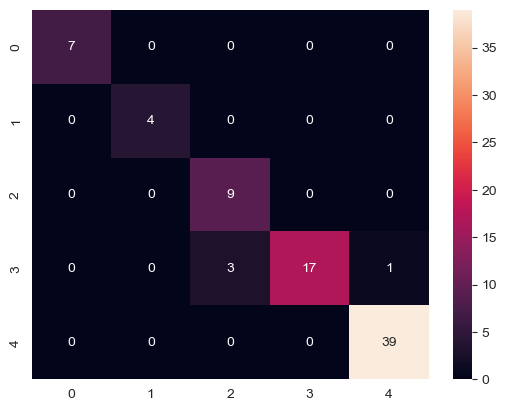

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [47]:
predict = cross_val_predict(tree_model, X=X, y=y, cv=5)
print("Classification Report:", classification_report(y, predict))

Classification Report:               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



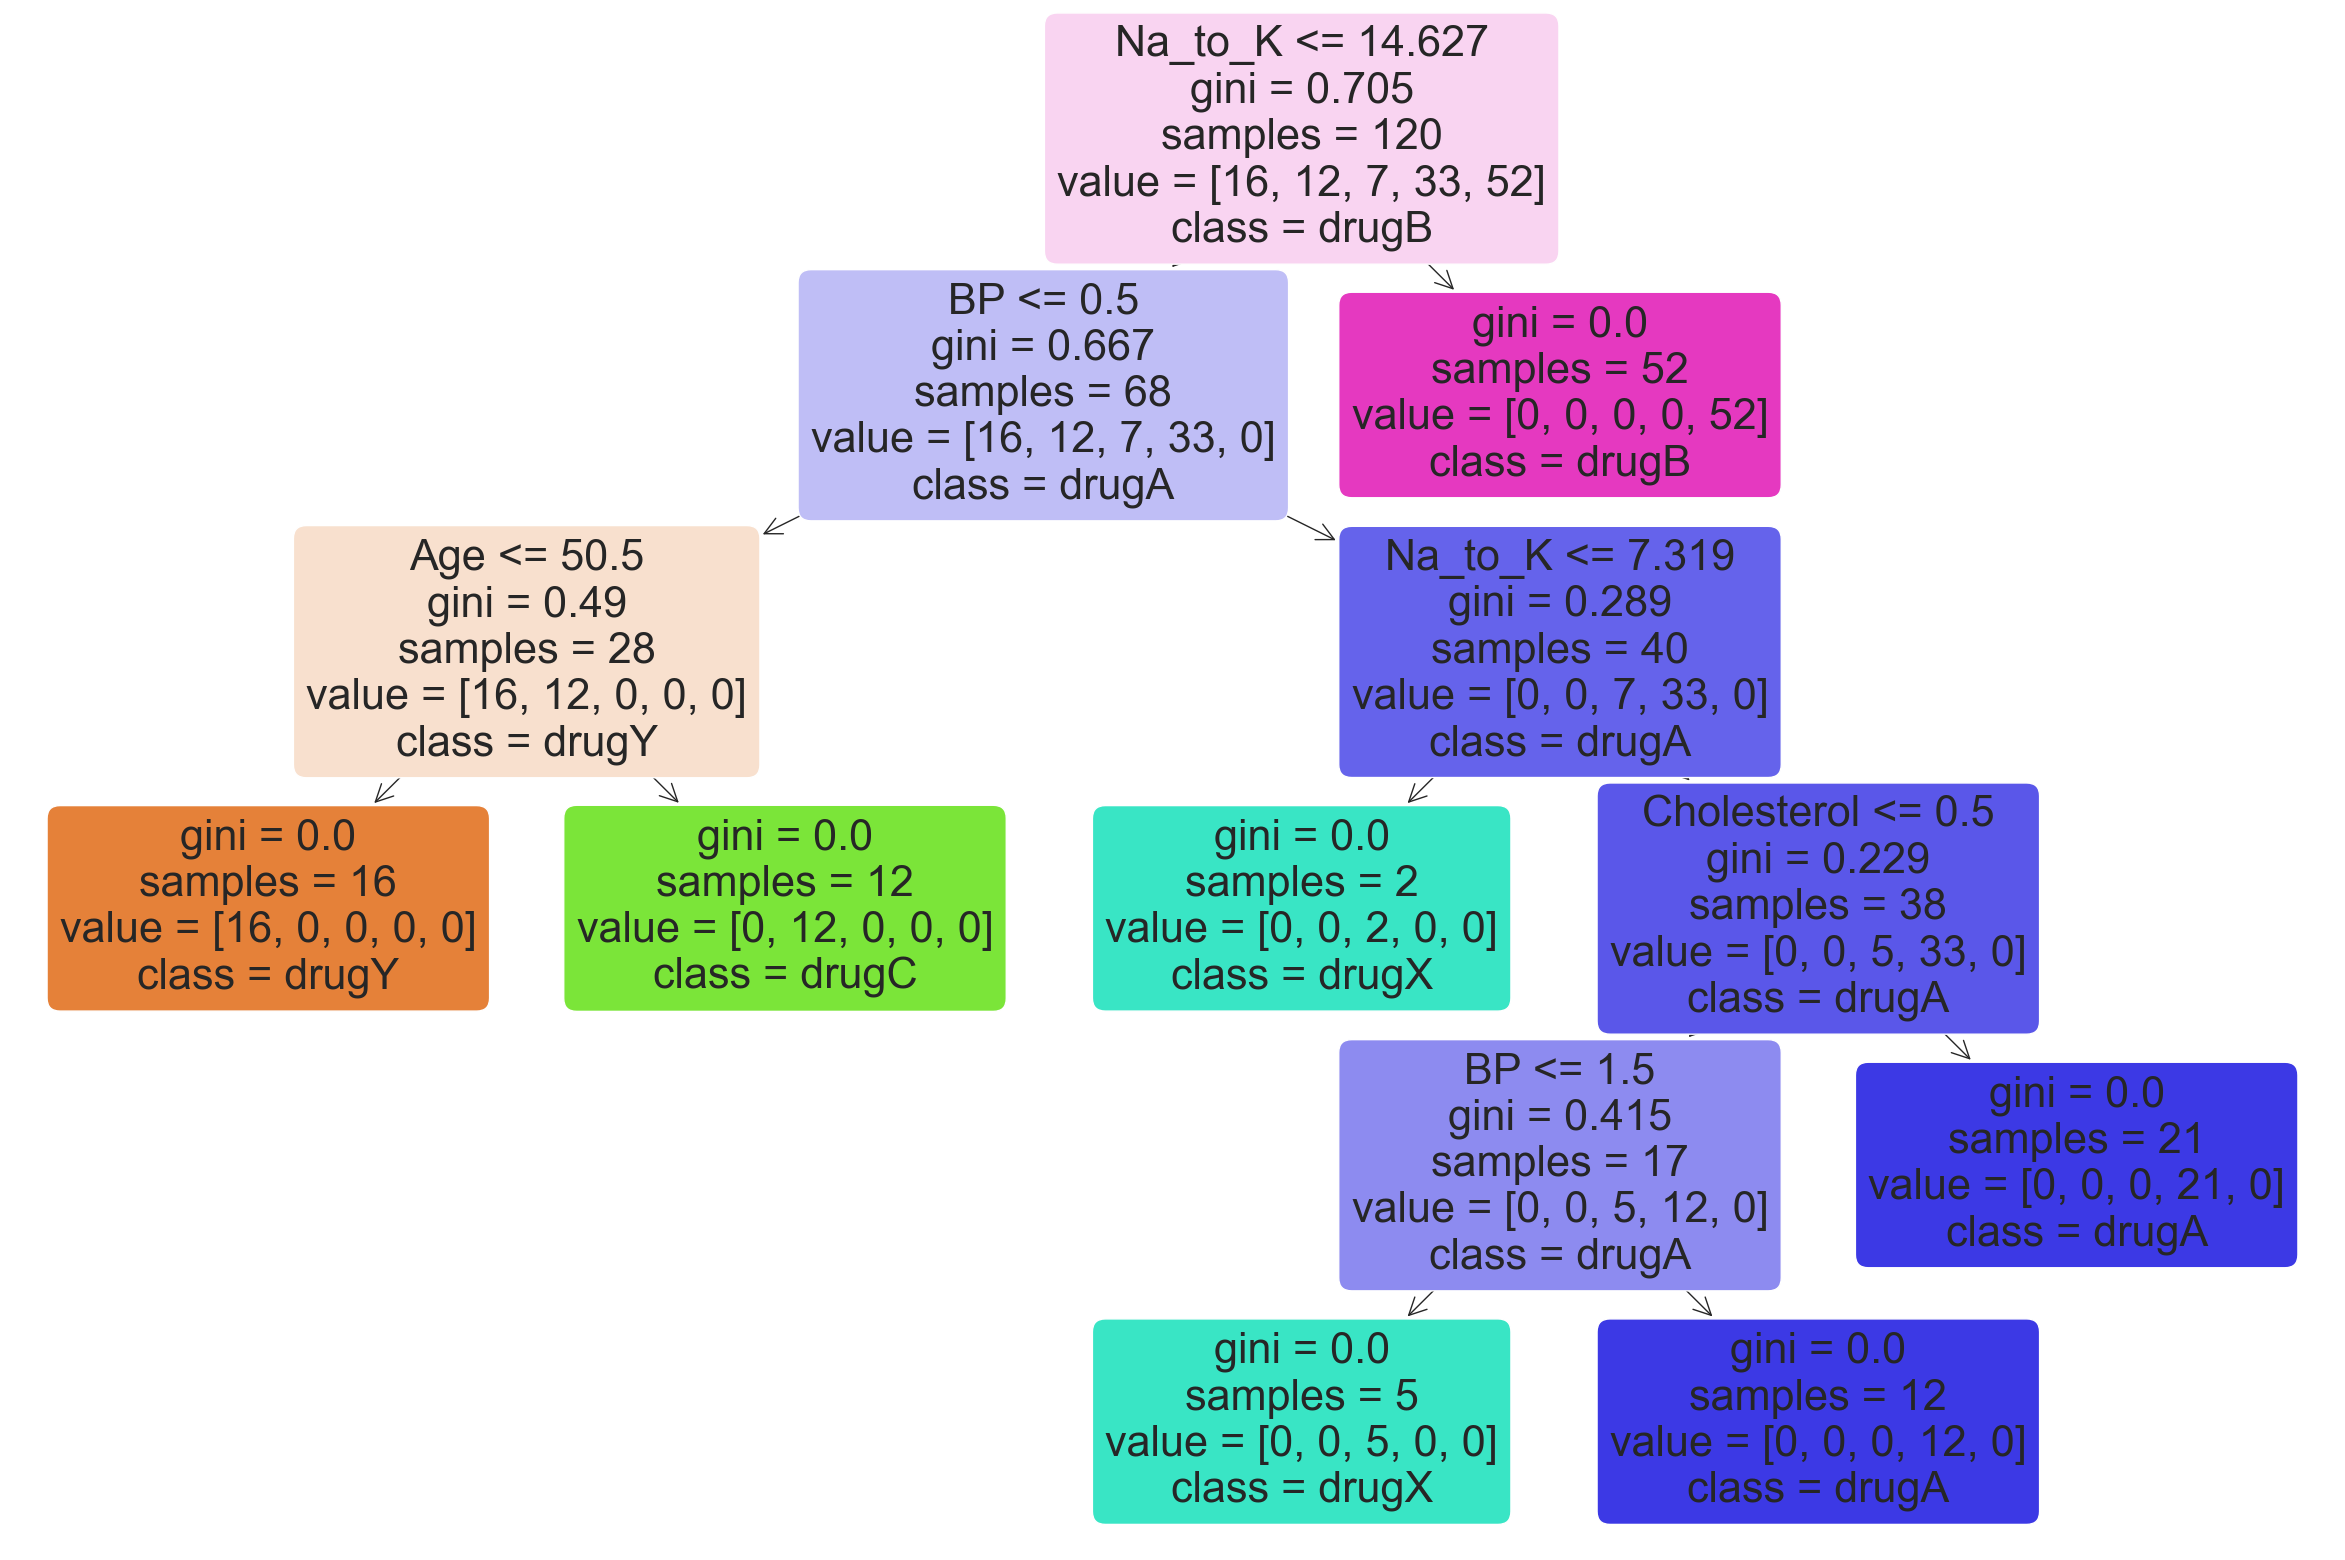

In [52]:
cols = df.drop("Drug", axis=1).columns
classes = df["Drug"].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True, rounded=True)
plt.show()